In [2]:
import numpy as np
import pandas as pd

from sklearn import datasets
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv('../../datasets/Advertising.csv',index_col=0)
df

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
...,...,...,...,...
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5


## Analyze data

In [12]:
df.describe()
# df.info()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [11]:
# get a cell value with loc:
df.loc[2,'TV']


# get a cell value with iloc:
df.iloc[1,0]


44.5

In [18]:
# get row with max TV ad:
max_tv_ad = df.TV.max()
max_tv_ad

df[ df.TV==max_tv_ad ]

,TV,radio,newspaper,sales
102,296.4,36.3,100.9,23.8


In [19]:
# get the row with max sales
df[ df.sales == df.sales.max()]

,TV,radio,newspaper,sales
176,276.9,48.9,41.8,27.0


In [25]:
# set NaN
df.loc[2, 'TV'] = np.nan
df

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,NaN,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
...,...,...,...,...
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5


In [27]:
# save to xlsx
# df.to_csv('ad_test.csv')

## clear the Nul values

In [35]:
# df.info()
df[ df.TV.isnull() ] 

,TV,radio,newspaper,sales
2,NaN,39.3,45.1,10.4


In [51]:
# fill null values with mean:
tv_mean = df.TV.mean()
print(f'tv_mean={tv_mean}')
      
df.TV.fillna(tv_mean, inplace=True)

tv_mean=147.55778894472363


In [52]:
# examples for Python F strings
# user_name = 'maria'
# print( "Hello " + user_name + " !")

# # Hello maria !

# print( f'Hello {user_name} !' )

In [53]:
df.head()

,TV,radio,newspaper,sales
1,230.100000,37.8,69.2,22.1
2,147.557789,39.3,45.1,10.4
3,17.200000,45.9,69.3,9.3
4,151.500000,41.3,58.5,18.5
5,180.800000,10.8,58.4,12.9


## Visualize data

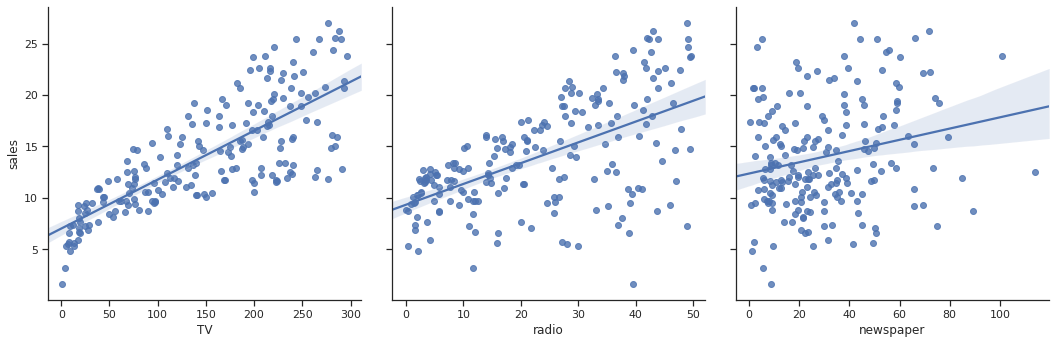

In [61]:
sns.set(style="ticks", color_codes=True)

sns.pairplot(df, 
             x_vars=['TV','radio','newspaper'],              
             y_vars='sales',
#              palette=sns.hls_palette(6, l=.6, s=.8),             
#              markers=["o"],
#              plot_kws={'line_kws':{'color':'#FFAAAA'},'scatter_kws':{'facecolors':'#AAFFAA'}},
             size=5, aspect=1,kind='reg')

## Select feature

In [63]:
# will use: TV, radio and newspaper

## Split train-test sets

In [65]:
df

,TV,radio,newspaper,sales
1,230.100000,37.8,69.2,22.1
2,147.557789,39.3,45.1,10.4
3,17.200000,45.9,69.3,9.3
4,151.500000,41.3,58.5,18.5
5,180.800000,10.8,58.4,12.9
...,...,...,...,...
196,38.200000,3.7,13.8,7.6
197,94.200000,4.9,8.1,9.7
198,177.000000,9.3,6.4,12.8
199,283.600000,42.0,66.2,25.5


In [78]:
X = df.loc[ : , 'TV':'newspaper']

# Task: select from first till second-last column

y = df.sales

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)


type(X_train)
print(f'X_train[0]:{X_train.iloc[0,0]}')

X_train[0]:109.8


## Choose the algorithm

In [79]:
from sklearn.linear_model import LinearRegression

## Train (fit) the model

In [81]:
lg = LinearRegression()
lg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [83]:
print(lg.intercept_)
print(lg.coef_)

2.9487206074573393
[0.04400919 0.19708853 0.00054747]


,TV,radio,newspaper
72,109.8,14.3,31.7
125,229.5,32.3,74.2
185,253.8,21.3,30.0
98,184.9,21.0,22.0
150,44.7,25.8,20.6
...,...,...,...
68,139.3,14.5,10.2
193,17.2,4.1,31.6
118,76.4,0.8,14.8
48,239.9,41.5,18.5


## Test the model

In [87]:
y_pred = lg.predict(X_test)

In [88]:
from sklearn import metrics

In [89]:
print('MSE: ', metrics.mean_squared_error(y_test, y_pred))

MSE:  3.973804063936023


In [91]:
print("{:20s}: {:.2f}".format("Training data score", lg.score(X_train, y_train)))
print("{:20s}: {:.2f}".format("Test set score",lg.score(X_test, y_test)))

Training data score : 0.90
Test set score      : 0.86
